# Kapitel 7: Neuronale Netzwerke

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow

In [5]:
from distutils.version import StrictVersion

In [6]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

0.18.2


In [7]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

1.2.1


In [8]:
import keras
print(keras.__version__)

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

Using TensorFlow backend.


2.0.2


In [9]:
# Evtl. hat Azure not 0.19, wir brauchen aber .20 fÃ¼r das Plotting, dann das hier installieren und Notebook neu starten
# !conda update pandas -y

In [10]:
import pandas as pd
print(pd.__version__)

assert StrictVersion(pd.__version__) >= StrictVersion('0.20.0')

0.20.1


## Iris mit Neuronalen Netzwerken

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc10ae6fb38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc10a4a24a8>]], dtype=object)

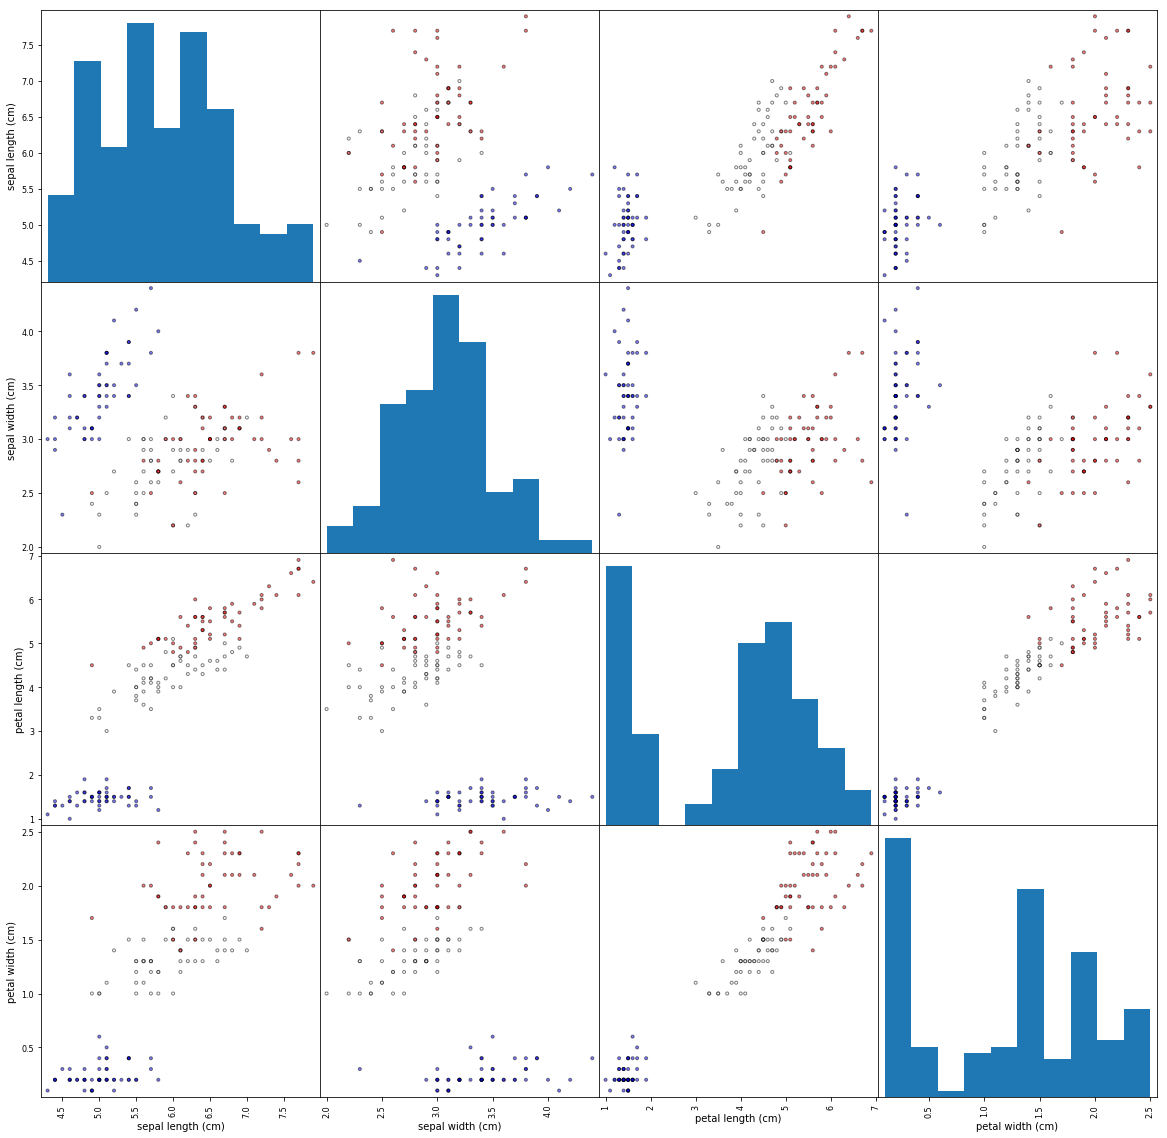

In [13]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, cmap=CMAP, edgecolor='black', figsize=(20, 20))

In [14]:
# plt.savefig('ML_0701.png', bbox_inches='tight')

## Das kÃ¼nstliche Neuron

In [15]:
w0 = 3
w1 = -4
w2 = 2

def neuron_no_activation(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sum

In [16]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [17]:
neuron_no_activation(5.1, 3.5)

-10.399999999999999

In [18]:
import math as math
def sigmoid(x):
    return 1 / (1 + math.exp(x * -1))

In [19]:
w0 = 3
w1 = -4
w2 = 2

def neuron(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sigmoid(sum)

In [20]:
neuron(5.1, 3.5)

3.043155690056538e-05

## Unser erste Neuronales Netz mit Keras

In [21]:
from keras.layers import Input
inputs = Input(shape=(4, ))

In [22]:
from keras.layers import Dense
fc = Dense(3)(inputs)

In [23]:
from keras.models import Model
model = Model(input=inputs, output=fc)

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 15.0
Trainable params: 15.0
Non-trainable params: 0.0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[-2.0578289 ,  0.24893801, -6.95904779]], dtype=float32)

In [27]:
inputs = Input(shape=(4, ))
fc = Dense(3)(inputs)
predictions = Dense(3, activation='softmax')(fc)
model = Model(input=inputs, output=predictions)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
Total params: 27.0
Trainable params: 27.0
Non-trainable params: 0.0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[  4.05035360e-04,   9.98843551e-01,   7.51323416e-04]], dtype=float32)

# Training

In [31]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [32]:
y[100]

2

In [33]:
from keras.utils.np_utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [34]:
y[100]

array([ 0.,  0.,  1.])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, random_state=42, stratify=y)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [37]:
!rm -r tf_log

# https://keras.io/callbacks/#tensorboard
tb_callback = keras.callbacks.TensorBoard(log_dir='./tf_log')
# To start tensorboard
# tensorboard --logdir=/mnt/c/Users/olive/Development/ml/tf_log
# open http://localhost:6006

In [38]:
%time model.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[tb_callback])

Train on 84 samples, validate on 36 samples
Epoch 1/500
84/84 [==============================] - 0s - loss: 3.3097 - acc: 0.3690 - val_loss: 3.6299 - val_acc: 0.2222
Epoch 2/500
84/84 [==============================] - 0s - loss: 3.1778 - acc: 0.3690 - val_loss: 3.4383 - val_acc: 0.2222
Epoch 3/500
84/84 [==============================] - 0s - loss: 3.0344 - acc: 0.3690 - val_loss: 3.2494 - val_acc: 0.2222
Epoch 4/500
84/84 [==============================] - 0s - loss: 2.9039 - acc: 0.3690 - val_loss: 3.0706 - val_acc: 0.2500
Epoch 5/500
84/84 [==============================] - 0s - loss: 2.7719 - acc: 0.3810 - val_loss: 2.9074 - val_acc: 0.2500
Epoch 6/500
84/84 [==============================] - 0s - loss: 2.6515 - acc: 0.3929 - val_loss: 2.7611 - val_acc: 0.2500

# Bewertung

In [39]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[ 0.88338238,  0.10971692,  0.0069007 ]], dtype=float32)

In [41]:
X[0], y[0]

(array([ 5.1,  3.5,  1.4,  0.2]), array([ 1.,  0.,  0.]))

In [42]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
train_loss, train_accuracy

 32/120 [=======>......................] - ETA: 0s

(0.40994858145713808, 0.97499999602635701)

In [43]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

30/30 [==============================] - 0s


(0.4212094247341156, 0.93333333730697632)